In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras

In [10]:
learning_rate=0.001
train_size=0.8
bs=32
epochs=200
feature_size=1

这些是模型的超参数。
- learning_rate 是学习率，控制模型收敛的快慢，太大了模型容易发散，太小了模型收敛很慢；
- train_size 训练集占整个数据集的比例，一般是28开；
- bs：batch size，批量大小，随机梯度下降算法SGD中，每次用来估计梯度的训练样本数量；
考虑到数据集本身只有100多个样本，批量不用太大；
- epochs：训练的轮数，即迭代次数；

In [11]:
df_list=pickle.load(open('问题3-分组数据.pkl','rb'))
scaler=pickle.load(open('问题3-scaler.pkl', 'rb'))
NUMERIC=pickle.load(open('问题3-因变量列名.pkl', 'rb'))
output_size=len(NUMERIC)

In [12]:
df_train=df_list[0][1]
df_train

,year,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,0,-1.614686,1.445963,0.525585,-2.058148,1.784696
12,2,-1.167833,0.219368,-0.566259,-0.773713,0.140593
24,4,0.614059,-0.780412,-0.463855,0.263030,-0.472703
36,6,0.066401,-0.667004,-0.717339,0.374028,-0.713805
48,8,1.038093,-1.413813,-0.892375,1.277783,-1.372190


In [37]:
df_list[0][0]

('HGI', 'G13')

In [21]:
inputs = keras.layers.Input(shape=(1,))
lstm_out = keras.layers.Dense(16, activation='relu')(inputs)
outputs = keras.layers.Dense(output_size)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 16)                32        
                                                                 
 dense_9 (Dense)             (None, 5)                 85        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(
    df_train.year.values,
    df_train[NUMERIC].values,
    batch_size=bs,
    epochs=epochs,
)
model.save('问题3-分组回归模型.h5')

Epoch 1/200
1/1 [==============================] - 0s 332ms/step - loss: 7.4604
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 7.3372
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 7.2156
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 7.0956
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 6.9772
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 6.8605
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 6.7455
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 6.6321
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 6.5204
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 6.4104
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 6.3020
Epoch 12/200
1/1 [==============================] - 0s 4ms/step - loss: 6.1953
Epoch 13/200
1/1 [==============================] - 0s 7ms

1/1 [==============================] - 0s 13ms/step - loss: 1.4485
Epoch 105/200
1/1 [==============================] - 0s 14ms/step - loss: 1.4307
Epoch 106/200
1/1 [==============================] - 0s 12ms/step - loss: 1.4133
Epoch 107/200
1/1 [==============================] - 0s 17ms/step - loss: 1.3963
Epoch 108/200
1/1 [==============================] - 0s 17ms/step - loss: 1.3796
Epoch 109/200
1/1 [==============================] - 0s 8ms/step - loss: 1.3633
Epoch 110/200
1/1 [==============================] - 0s 6ms/step - loss: 1.3473
Epoch 111/200
1/1 [==============================] - 0s 10ms/step - loss: 1.3317
Epoch 112/200
1/1 [==============================] - 0s 6ms/step - loss: 1.3164
Epoch 113/200
1/1 [==============================] - 0s 5ms/step - loss: 1.3014
Epoch 114/200
1/1 [==============================] - 0s 10ms/step - loss: 1.2867
Epoch 115/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2723
Epoch 116/200
1/1 [============================

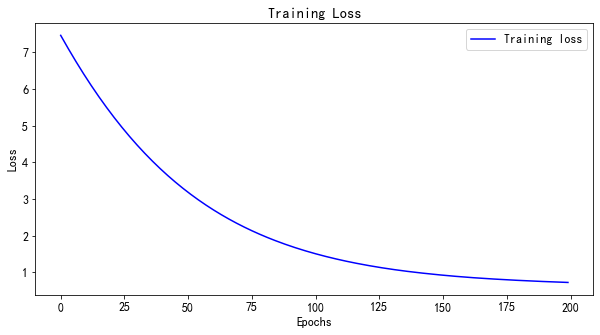

In [23]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training Loss")

In [34]:
year_list=[10, 12, 14, 16, 18]
pred = model.predict(year_list)
# pred = scaler.inverse_transform(pred)
df_pred = pd.DataFrame(data=pred, columns=NUMERIC)
df_pred['year']=year_list
df_pred

,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,year
0,0.704257,-1.146076,-2.518708,0.561034,-1.507976,10
1,0.867481,-1.331555,-3.091973,0.665227,-1.854217,12
2,1.029496,-1.523107,-3.669667,0.765628,-2.200993,14
3,1.191117,-1.716640,-4.248805,0.864794,-2.547943,16
4,1.352738,-1.910174,-4.827942,0.963959,-2.894893,18


In [35]:
df=pd.concat([df_train, df_pred])
df

,year,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比
0,0,-1.614686,1.445963,0.525585,-2.058148,1.784696
12,2,-1.167833,0.219368,-0.566259,-0.773713,0.140593
24,4,0.614059,-0.780412,-0.463855,0.263030,-0.472703
36,6,0.066401,-0.667004,-0.717339,0.374028,-0.713805
48,8,1.038093,-1.413813,-0.892375,1.277783,-1.372190
0,10,0.704257,-1.146076,-2.518708,0.561034,-1.507976
1,12,0.867481,-1.331555,-3.091973,0.665227,-1.854217
2,14,1.029496,-1.523107,-3.669667,0.765628,-2.200993
3,16,1.191117,-1.716640,-4.248805,0.864794,-2.547943
4,18,1.352738,-1.910174,-4.827942,0.963959,-2.894893


In [36]:
px.line(df,x='year',y=NUMERIC)